In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data preprocessing

In [2]:
# loading data - students' social details and grades from Portuguese
data = pd.read_csv("student-por.csv", delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# checking if any data is missing
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
# transforming the datatypes of the variables to boolean and numeric values for better manipulation later on
data2 = data.copy()
data2['school'] = data2['school'] == "GP"
data2['sex'] = data2['sex'] == "F"
data2['address'] = data2['address'] == "U"
data2['famsize'] = data2['famsize'] == "LE3"
data2['Pstatus'] = data2['Pstatus'] == "T"
data2['schoolsup'] = data2['schoolsup'] == "yes"
data2['famsup'] = data2['famsup'] == "yes"
data2['paid'] = data2['paid'] == "yes"
data2['activities'] = data2['activities'] == "yes"
data2['nursery'] = data2['nursery'] == "yes"
data2['higher'] = data2['higher'] == "yes"
data2['internet'] = data2['internet'] == "yes"
data2['romantic'] = data2['romantic'] == "yes"

# creating a new column in the dataframe which shows whether the student passed the class or not (>=10 is a pass)
data2['passed'] = (data2['G3'] >= 10)
data2 = pd.get_dummies(data2)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             649 non-null    bool 
 1   sex                649 non-null    bool 
 2   age                649 non-null    int64
 3   address            649 non-null    bool 
 4   famsize            649 non-null    bool 
 5   Pstatus            649 non-null    bool 
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  failures           649 non-null    int64
 11  schoolsup          649 non-null    bool 
 12  famsup             649 non-null    bool 
 13  paid               649 non-null    bool 
 14  activities         649 non-null    bool 
 15  nursery            649 non-null    bool 
 16  higher             649 non-null    bool 
 17  internet        

# Data visualization
Showing the relationship between variables

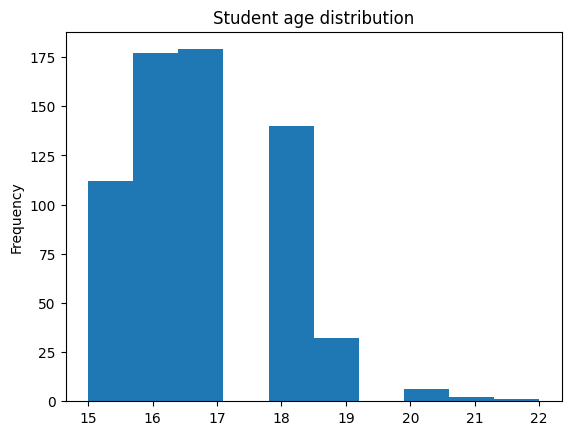

In [5]:
# showing ages of students that are in this dataset
data2.age.plot(kind='hist', title="Student age distribution")
plt.show()

/tmp/ipykernel_6894/3281324668.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  data2.groupby(by="passed").age.apply(lambda x: sns.distplot(x, label=x.name))
/tmp/ipykernel_6894/3281324668.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  data2.groupby(by="passed").age.apply(lambda x: sns.distplot(x, label=x.name))


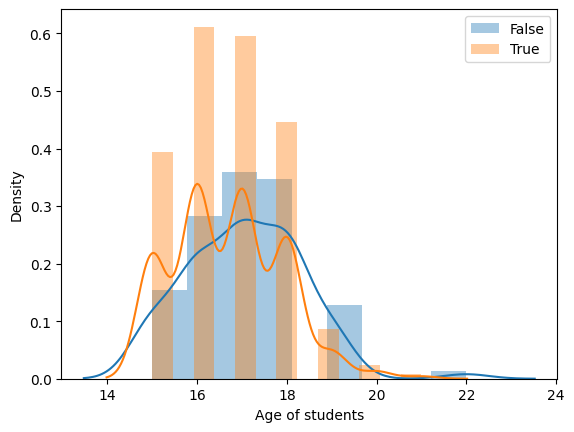

In [6]:
import seaborn as sns

#show correlation between age and whether the student passed the class
fig, ax = plt.subplots()
data2.groupby(by="passed").age.apply(lambda x: sns.distplot(x, label=x.name))
ax.set_xlabel("Age of students")
ax.legend()
plt.show()
#the histogram shows that there is no clear correlation between age and passing

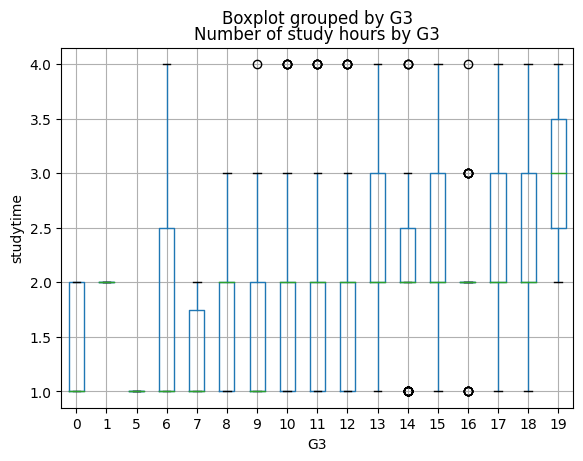

In [7]:
# show the relationship between studytime and student's final grade
ax = data.boxplot(column='studytime', by='G3')
ax.set_title("Number of study hours by G3")
ax.set_ylabel("studytime")
plt.show()
# the grapf shows that in general the students who studied more have better final grades

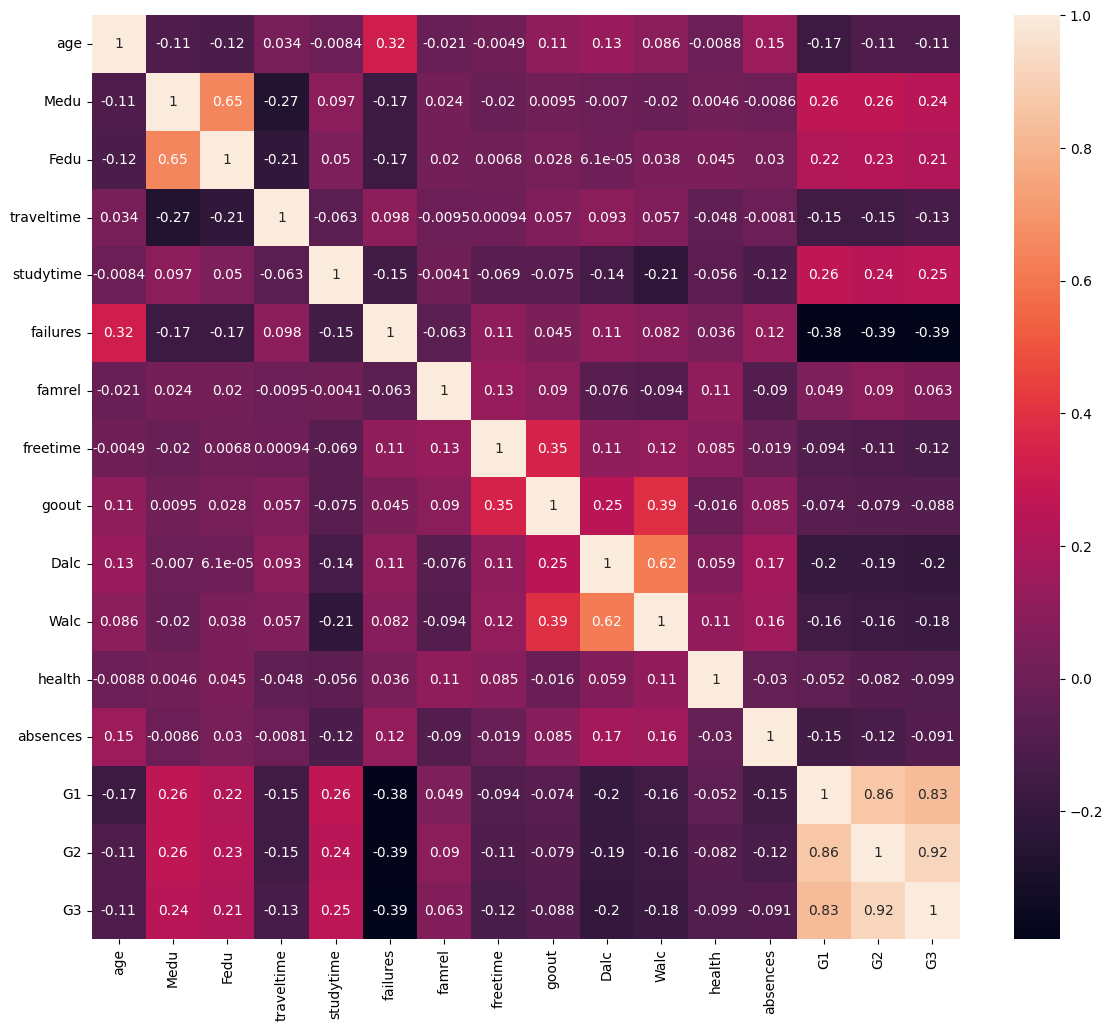

In [8]:
# create temporary dataframe to work with only numeric values and fewer values
temp = data.select_dtypes(include=np.number)
cor_matrix = temp.corr()

plt.figure(figsize=(14,12))
sns.heatmap(cor_matrix, annot=True)
plt.show()
# the heatmap shows that there is a great correlation between the grades from first exam during the semester (G1)
# second (G2), and the final grade (G3)
# as well as, parents' education levels are grately correlated between one another
# student who are more drink during the work week are more likely to drink during the weekend and vice versa

# Algorithm implemetation

In [9]:
# separating the dataframe into train, validation and test data
x_train, x_test, y_train, y_test = train_test_split(data2.drop(columns=['G3', 'passed']), data2.passed, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) 

In [10]:
y_data = data2.passed
x_data = data2.drop(columns=['G3', 'passed'])

print("původní data")
display(x_data.shape)
display(y_data.shape)
print("trénovací data")
display(x_train.shape)
display(y_train.shape)
print("validační data")
display(x_val.shape)
display(y_val.shape)
print("testovací data")
display(x_test.shape)
display(y_test.shape)

původní data


(649, 45)

(649,)

trénovací data


(389, 45)

(389,)

validační data


(130, 45)

(130,)

testovací data


(130, 45)

(130,)

### Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [12]:
import sklearn.metrics as metrics
val = []
train = []
depths = range(1,30)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    train.append(metrics.accuracy_score(y_train, dt.predict(x_train)))
    val.append(metrics.accuracy_score(y_val, dt.predict(x_val)))

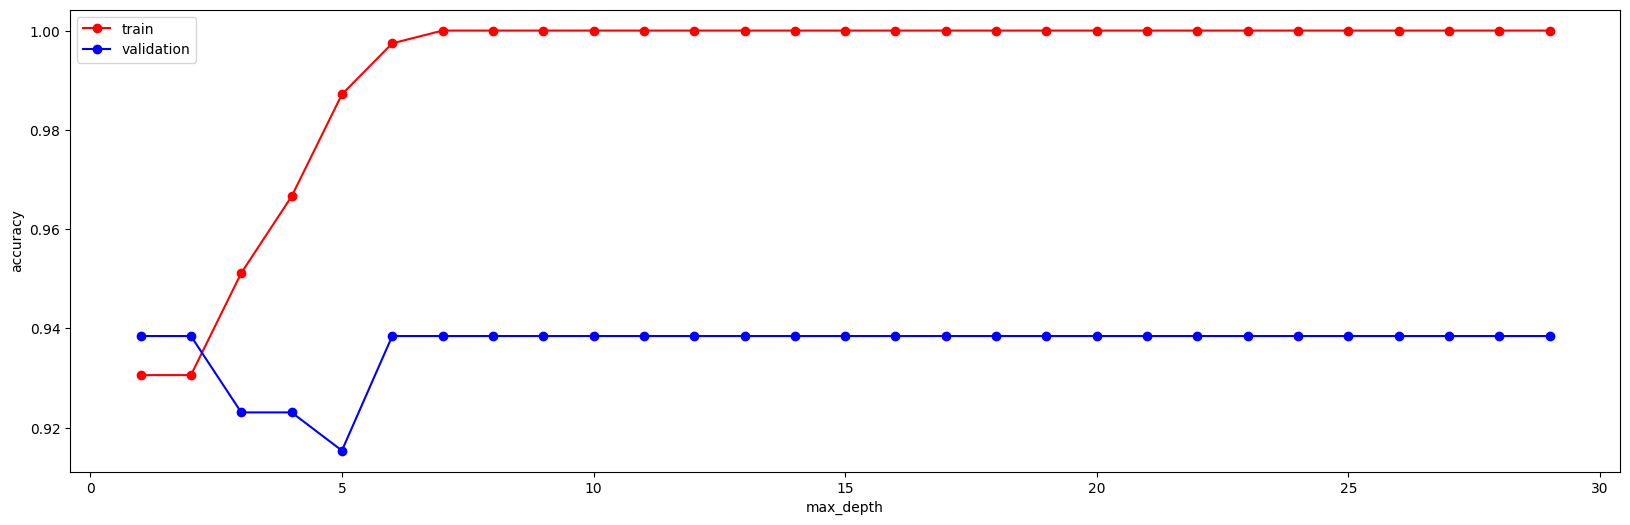

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(depths, train,'or-')
plt.plot(depths, val,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [14]:
optimal_depth = np.argmax(val) + 1
optimal_depth

1

In [15]:
dt = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt.fit(x_train, y_train)
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(y_test, dt.predict(x_test))))

accuracy score (test): 0.953846


[Text(0.5, 0.75, 'Mjob_at_home <= 8.5\ngini = 0.292\nsamples = 389\nvalue = [69, 320]\nclass = y[1]'),
 Text(0.25, 0.25, 'gini = 0.117\nsamples = 48\nvalue = [45, 3]\nclass = y[0]'),
 Text(0.75, 0.25, 'gini = 0.131\nsamples = 341\nvalue = [24, 317]\nclass = y[1]')]

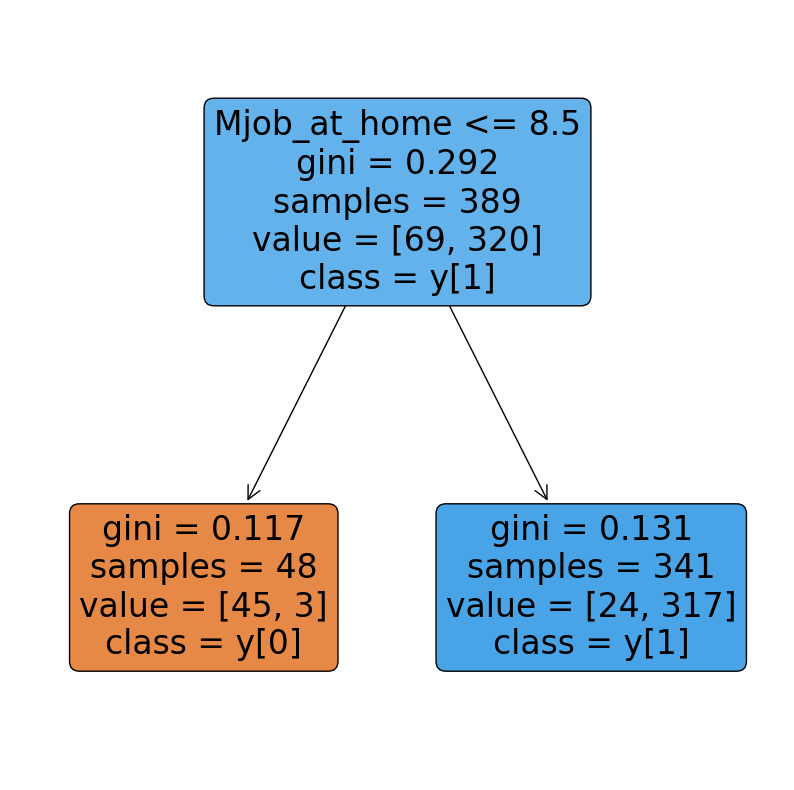

In [16]:
plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names=x_data.iloc[:,1:].columns, class_names=True, rounded=True)

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [18]:
val_acc = []
train_acc = []
depths = range(1,30)
for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(x_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, rf.predict(x_train)))
    val_acc.append(metrics.accuracy_score(y_val, rf.predict(x_val)))

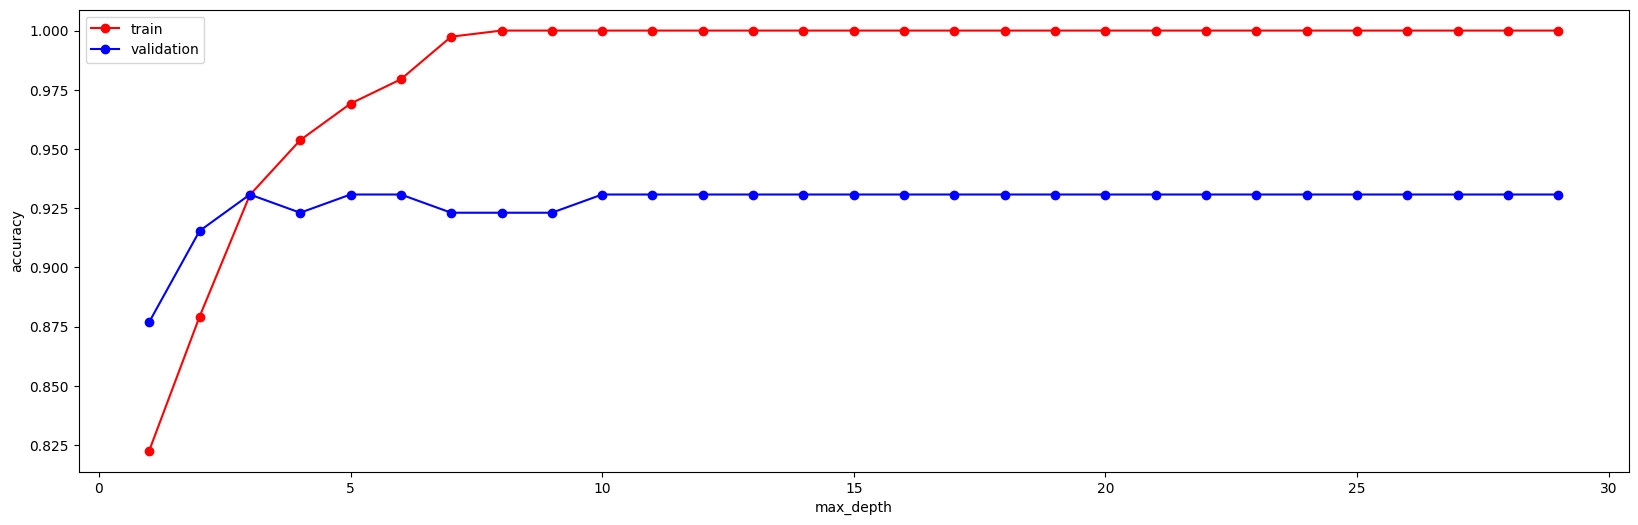

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(depths, train_acc,'or-')
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [20]:
optimal_depth = np.argmax(val_acc) + 1
optimal_depth

3

In [21]:
rf = RandomForestClassifier(max_depth=optimal_depth, random_state=42)
rf.fit(x_train, y_train)
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(y_test, rf.predict(x_test))))

accuracy score (test): 0.915385


### KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
k_val = []
k_train = []
neighbors = range(1,100)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    k_train.append(metrics.accuracy_score(y_train, knn.predict(x_train)))
    k_val.append(metrics.accuracy_score(y_val, knn.predict(x_val)))

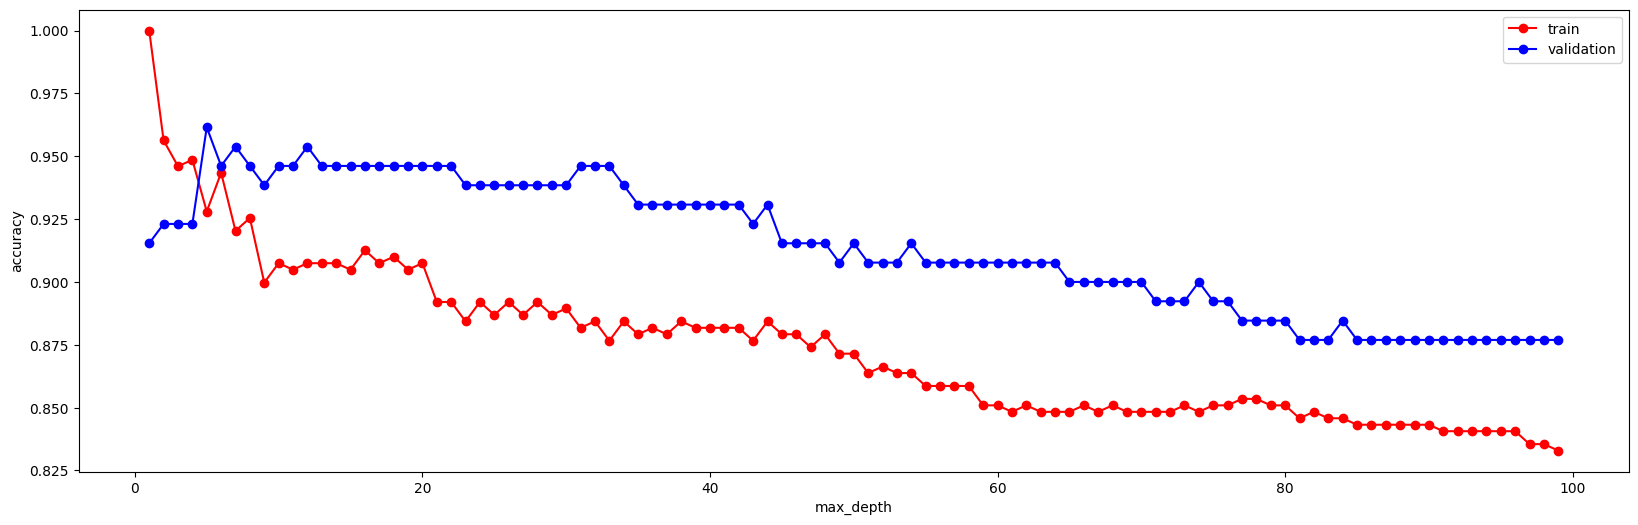

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(neighbors, k_train,'or-')
plt.plot(neighbors, k_val,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [24]:
optimal_neighbor = np.argmax(k_val) + 1
optimal_neighbor

5

In [25]:
knn = KNeighborsClassifier(n_neighbors=optimal_neighbor)
knn.fit(x_train, y_train)
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(y_test, knn.predict(x_test))))

accuracy score (test): 0.930769


# Conclusion
Decision Tree Classifier performed the best at separating the students into categories.

# Sources
dataset: http://archive.ics.uci.edu/ml/datasets/Student+Performance